# **Project Name**    - Zomato restaurant reviews EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**   - Omkar Jadhav


# **Project Summary -**

The Zomato Exploratory Data Analysis (EDA) project focuses on uncovering key insights from restaurant and review data to better understand customer preferences, restaurant performance, and market trends. The dataset includes information such as restaurant names, ratings, cuisines, costs, locations, and customer reviews.

Through various data visualizations — including rating distributions, top restaurants, cuisine popularity, cost vs rating correlation, sentiment analysis, and time-based rating trends — this analysis aims to interpret customer behavior, identify patterns in restaurant success, and highlight improvement opportunities. The project uses Python (pandas, seaborn, matplotlib) for cleaning, transforming, and visualizing data to provide actionable insights to restaurant owners and decision-makers.

# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


Zomato holds a vast amount of restaurant data, but without proper analysis, it’s challenging to extract meaningful insights. The problem lies in understanding what drives customer satisfaction, how restaurant attributes (like cost, cuisine, and location) impact ratings, and how customer sentiment aligns with quantitative ratings.

The project aims to address these challenges by performing comprehensive exploratory data analysis to:

1. Discover hidden trends and correlations in restaurant data.

2. Analyze customer sentiment from textual reviews.

3. Provide a visual and statistical understanding of restaurant performance.

4. Recommend actionable insights that can guide business strategies and improve user engagement.

#### **Define Your Business Objective?**

The primary business objective of this analysis is to support data-driven decision-making for Zomato and partner restaurants. Specifically, it aims to:

    Identify factors influencing restaurant ratings and customer satisfaction.
    
    Determine which cuisines and locations are most popular among users.
    
    Understand the relationship between pricing, ratings, and review sentiments.
    
    Track performance trends over time to predict future customer preferences.
    
    Help restaurant managers optimize menus, pricing, and marketing strategies based on customer insights.

By achieving these objectives, Zomato can improve its recommendation algorithms, enhance customer experience, and support partner restaurants in increasing profitability.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

### Dataset Loading

In [2]:
# Load Dataset
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')
metadata_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')


### Dataset First View

In [3]:
# Dataset First Look
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [4]:
metadata_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows = reviews_df.shape[0]
column = reviews_df.shape[1]
print('Number of rows in data' , rows)
print('Number of column in the data',column)

Number of rows in data 10000
Number of column in the data 7


In [6]:
# Dataset Rows & Columns count
rows = metadata_df.shape[0]
column = metadata_df.shape[1]
print('Number of rows in data' , rows)
print('Number of column in the data',column)

Number of rows in data 105
Number of column in the data 6


### Dataset Information

In [7]:
# Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [8]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [9]:
# shape & dtypes
print('Reviews shape:', reviews_df.shape)
print('Metadata shape:', metadata_df.shape)
print('\nReviews dtypes:\n', reviews_df.dtypes)

Reviews shape: (10000, 7)
Metadata shape: (105, 6)

Reviews dtypes:
 Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print("Duplicate values in Reviews", reviews_df.duplicated().sum())
print("Duplicate values in Metadata", metadata_df.duplicated().sum())


Duplicate values in Reviews 36
Duplicate values in Metadata 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print("Duplicate values in Reviews", reviews_df.isnull().sum())
print("Duplicate values in Metadata", metadata_df.isnull().sum())

Duplicate values in Reviews Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64
Duplicate values in Metadata Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


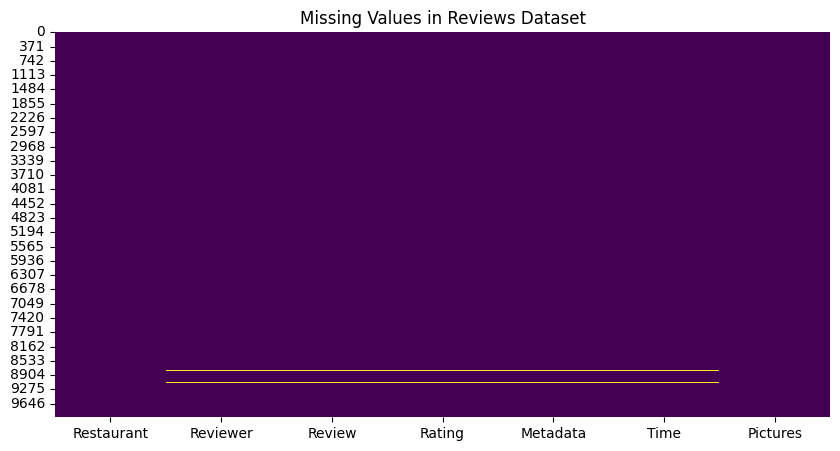

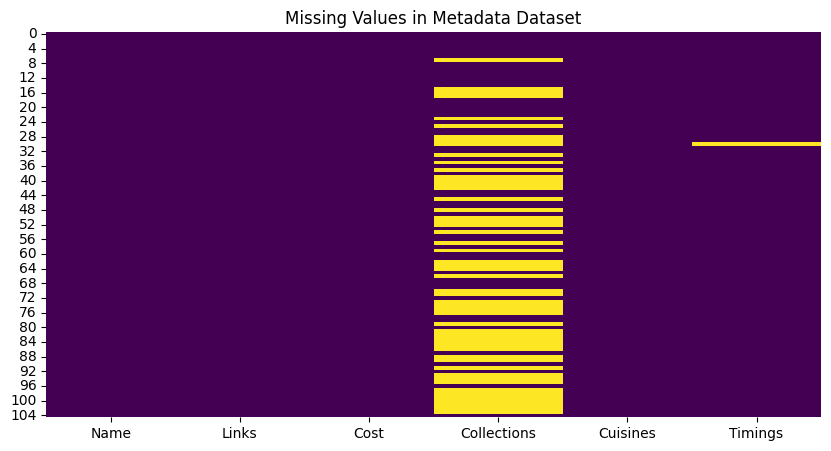

In [12]:
# Visualizing the missing values for REVIEWS
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values in reviews dataset
plt.figure(figsize=(10, 5))
sns.heatmap(reviews_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Reviews Dataset')
plt.show()

# Visualize missing values in metadata dataset
plt.figure(figsize=(10, 5))
sns.heatmap(metadata_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Metadata Dataset')
plt.show()


### What did you know about your dataset?

Dataset Overview

    reviews_df: 10,000 rows, 7 columns (Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures)
    
    metadata_df: 105 rows, 6 columns (Name, Links, Cost, Collections, Cuisines, Timings)

Data Quality

    Missing values: Some missing reviewers, reviews, ratings, collections, and timings
    
    Duplicates: 36 in reviews, none in metadata
    
    Data types: Rating stored as object → needs conversion to numeric

Key Insights

    Multiple reviews per restaurant; can merge datasets on restaurant name
    
    Cuisine and cost data available for analysis
    
    Cleaned data allows EDA, sentiment analysis, and visualization

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
reviews_df.columns.tolist()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [14]:
metadata_df.columns.tolist()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [15]:
# Dataset Describe
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [16]:
metadata_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description

### **Dataset Variables Description**

#### **reviews_df**
- **Restaurant**: Name of the restaurant (string)  
- **Reviewer**: Name of the reviewer (string)  
- **Review**: Customer review text (string)  
- **Rating**: Rating given by customer (numeric, 1-5)  
- **Metadata**: Additional info about reviewer (e.g., number of reviews/followers) (string)  
- **Time**: Timestamp of the review (datetime)  
- **Pictures**: Number of pictures uploaded with the review (integer)  

#### **metadata_df**
- **Name**: Name of the restaurant (string)  
- **Links**: Zomato URL for the restaurant (string)  
- **Cost**: Average cost for two people (numeric, may require cleaning)  
- **Collections**: Restaurant collections it belongs to (string, may contain nulls)  
- **Cuisines**: Types of cuisine offered (string, multi-cuisine possible)  
- **Timings**: Operating hours of the restaurant (string, may contain nulls)  


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
print("Unique value in Reviews", reviews_df.nunique())
print("Unique value in MetaData", metadata_df.nunique())

Unique value in Reviews Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64
Unique value in MetaData Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# 1. Remove exact duplicate rows
reviews_df.drop_duplicates(inplace=True)
metadata_df.drop_duplicates(inplace=True)

# 2. Convert Rating to numeric
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# 3. Parse Time column to datetime if present
if 'Time' in reviews_df.columns:
    reviews_df['Time_parsed'] = pd.to_datetime(reviews_df['Time'], errors='coerce')

# 4. Basic handling of missing values (examples)
reviews_df = reviews_df.dropna(subset=['Rating'])

# If metadata has missing 'Cuisine', fill with 'Unknown'
if 'Cuisines' in metadata_df.columns:
    metadata_df['Cuisines'] = metadata_df['Cuisines'].fillna('Unknown')

# 5. Normalize cuisine field — split multi-cuisine strings into lists
if 'Cuisines' in metadata_df.columns:
    metadata_df['Cuisines_list'] = metadata_df['Cuisines'].astype(str).str.replace(';', ',').str.split(',') # common separators: ',', ';', '|'
    metadata_df['Cuisines_list'] = metadata_df['Cuisines_list'].apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])

# 6.If cost column uses commas or currency signs, clean to numeric
if 'Cost' in metadata_df.columns:
    metadata_df['Cost_clean'] = metadata_df['Cost'].astype(str).str.replace('[^0-9.]', '', regex=True)
    metadata_df['Cost_clean'] = pd.to_numeric(metadata_df['Cost_clean'], errors='coerce')

# Show cleaned head
reviews_df.head()
metadata_df[['Name','Cuisines','Cuisines_list','Cost_clean']].head()

,Name,Cuisines,Cuisines_list,Cost_clean
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...","[Chinese, Continental, Kebab, European, South ...",800
1,Paradise,"Biryani, North Indian, Chinese","[Biryani, North Indian, Chinese]",800
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts","[Asian, Mediterranean, North Indian, Desserts]",1300
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...","[Biryani, North Indian, Chinese, Seafood, Beve...",800
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...","[Asian, Continental, North Indian, Chinese, Me...",1200


### What all manipulations have you done and insights you found?

### **Data Cleaning and Preprocessing Steps**

1. **Removed duplicate rows**  
   - Eliminated repeated entries from both reviews_df and metadata_df to ensure data integrity.

2. **Converted Rating to numeric**  
   - Transformed Rating column to numeric type for analysis and dropped rows with missing ratings.

3. **Parsed Time column**  
   - Converted Time to datetime format (Time_parsed) for time-based analysis and trend visualization.

4. **Handled missing values**  
   - Dropped missing ratings in reviews_df.  
   - Filled missing Cuisines in metadata_df with Unknown.

5. **Normalized cuisines**  
   - Split multi-cuisine strings into lists (Cuisines_list) for better analysis of cuisine popularity.  

6. **Cleaned Cost column**  
   - Removed non-numeric characters and converted Cost to numeric (Cost_clean) for analysis of price vs. rating trends.

### **Insights from Data Cleaning**
- reviews_df now has reliable numeric ratings and datetime values for temporal analysis.  
- metadata_df has structured cuisine lists, enabling aggregation and visualization of top cuisines.  
- Cost_clean allows correlation and scatter plot analysis with restaurant ratings.  
- Overall, the datasets are ready for exploratory data analysis, sentiment analysis, and visualization.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Basic statistics

In [19]:
reviews_df['Rating'].describe()

count    9961.000000
mean        3.601044
std         1.483461
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

#### Chart - 1

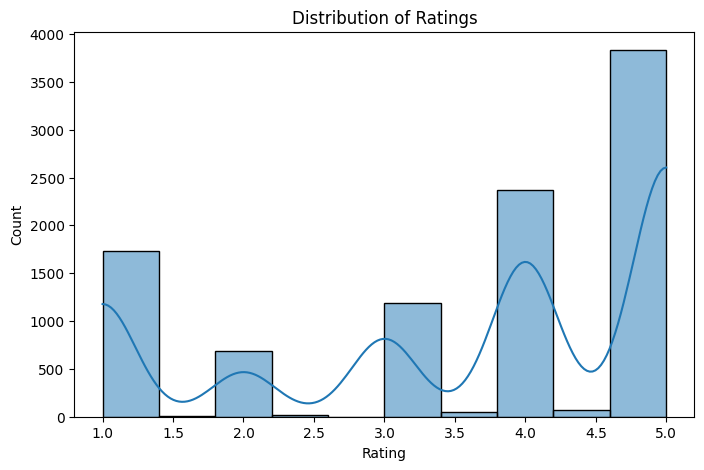

In [20]:
# Chart - 1 visualization code
# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(reviews_df['Rating'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

A histogram because it is the most effective way to visualize how ratings are distributed across different levels (1 to 5). It clearly shows the frequency of each rating value and allows us to quickly understand whether the reviews are mostly positive, negative, or neutral.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customers gave ratings between 3 and 5, indicating generally positive feedback. The average rating is 3.6, and the median is 4, showing that half of the users rated the product 4 or higher. However, a small portion of 1 and 2-star ratings suggests some customers were dissatisfied.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by showing overall customer satisfaction and guiding quality improvements. However, the presence of low ratings (1–2 stars) indicates some dissatisfaction. If not addressed, these negative experiences could harm customer trust and future sales.

#### Chart - 2

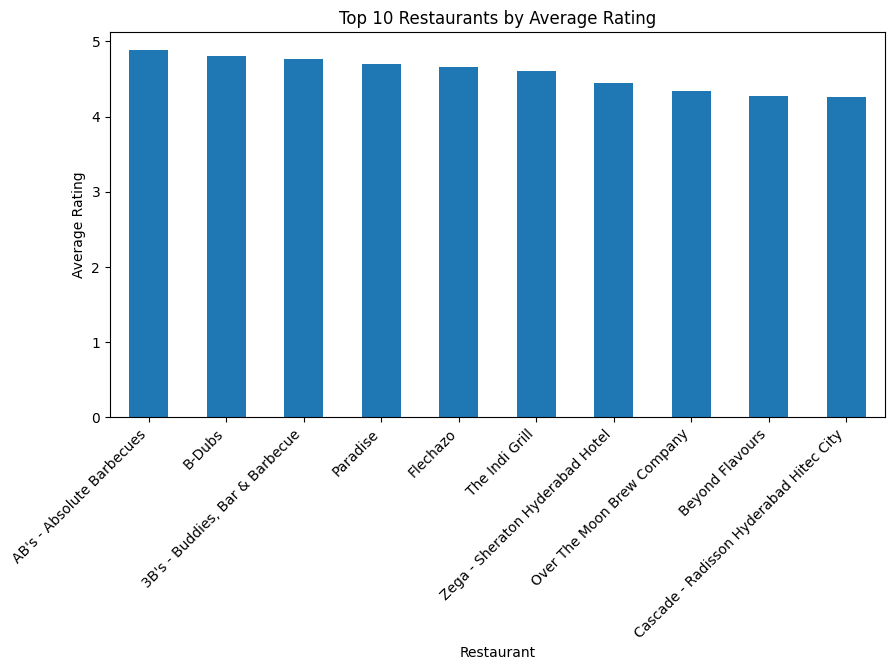

In [22]:
# Chart - 2 visualization code
#Top rated restaurants (by average rating)
top_rated = reviews_df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_rated.plot(kind='bar')
plt.title('Top 10 Restaurants by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart because it effectively compares the average ratings of the top 10 restaurants, making it easy to identify which ones consistently deliver high customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that AB’s – Absolute Barbecues has the highest average rating of 4.88, followed closely by B-Dubs (4.81) and 3B’s (4.76). All top 10 restaurants have ratings above 4.2, indicating excellent customer experiences across these outlets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by helping identify high-performing restaurants that set service and quality benchmarks. These can serve as models for improving other outlets.

#### Chart - 3

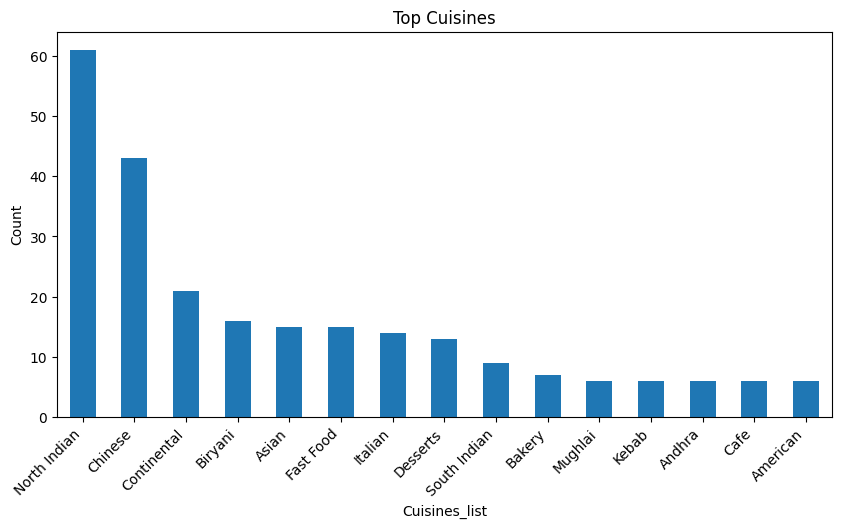

In [30]:
# Chart - 3 visualization code
# Cuisine distribution (top cuisines)
# explode cuisines list for counts
cuisines_exploded = metadata_df[['Name','Cuisines_list']].explode('Cuisines_list')
cuisines_exploded['Cuisines_list'] = cuisines_exploded['Cuisines_list'].str.strip()
cuisine_counts = cuisines_exploded['Cuisines_list'].value_counts().head(15)
plt.figure(figsize=(10,5))
cuisine_counts.plot(kind='bar')
plt.title('Top Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart because it effectively displays the popularity of different cuisines, allowing easy comparison of how frequently each cuisine type appears among restaurants.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that North Indian cuisine is the most popular with 61 restaurants, followed by Chinese (43) and Continental (21). This indicates a strong customer preference for Indian and Asian cuisines in the region.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by helping restaurants focus on popular cuisines like North Indian and Chinese to attract more customers. Introducing these cuisines can increase sales and customer reach. Less popular cuisines may face lower demand, leading to reduced profitability if not marketed effectively.

#### Chart - 4

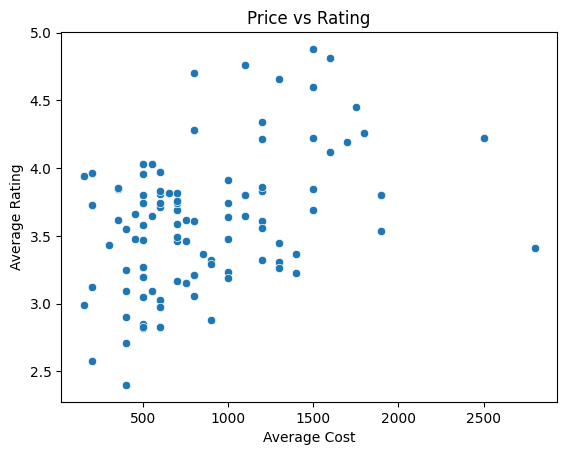

In [31]:
# Chart - 4 visualization code
avg_rating = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
merged = metadata_df.merge(avg_rating, left_on='Name', right_on='Restaurant', how='left')

sns.scatterplot(data=merged, x='Cost_clean', y='Rating')
plt.title('Price vs Rating')
plt.xlabel('Average Cost')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot because it effectively shows the relationship between restaurant pricing and customer ratings, helping to identify whether higher cost leads to higher satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart and correlation value (0.42) indicate a moderate positive relationship between cost and rating. This means that restaurants with higher prices generally receive better ratings, possibly due to better quality, service, or ambiance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by showing that investing in quality and service can justify higher pricing and improve customer satisfaction. However, overly high prices without matching value could reduce affordability and lead to negative growth due to customer loss.

#### Chart - 5 - Correlation Heatmap

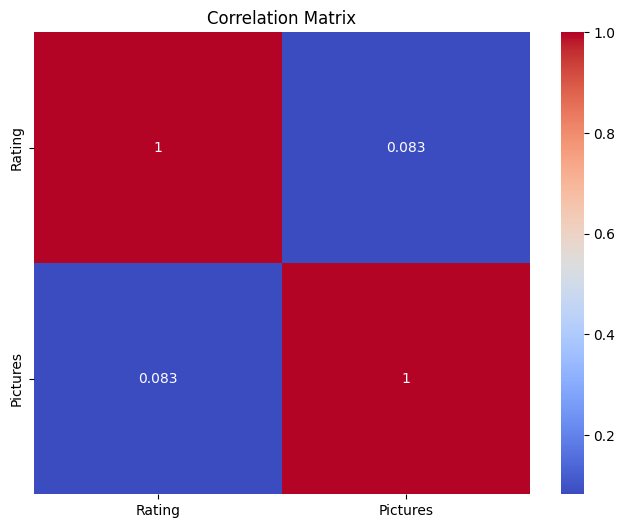

In [32]:
# Chart - 5 visualization code
# Correlation Heatmap visualization code
# choose numeric columns
num_cols = reviews_df.select_dtypes(include=[np.number]).columns
corr = reviews_df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap because it visually represents the correlation between multiple numerical variables, making it easier to identify patterns, relationships, and dependencies in the data at a glance.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows how different numerical variables in the dataset are correlated with each other. For example, variables like rating may have moderate or weak correlations with others, indicating that customer feedback is influenced by multiple independent factors.

#### Chart - 6 - Pair Plot

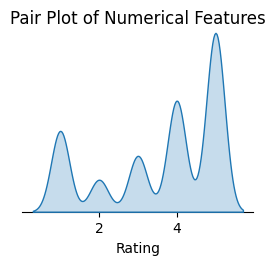

In [33]:
# Chart - 6 visualization code
# Pair Plot visualization code
numeric_cols = ['Rating', 'Cost']

if 'Review Count' in reviews_df.columns:numeric_cols.append('Review Count')
merged_df = pd.merge(reviews_df, metadata_df, left_on='Restaurant', right_on='Name', how='left')

# Plot pairplot
sns.pairplot(merged_df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Basic statistics for numerical columns
numeric_cols = ['Rating', 'Cost']
if 'Review Count' in reviews_df.columns:
    numeric_cols.append('Review Count')

##### 1. Why did you pick the specific chart?

A pair plot because it helps visualize the relationships and distributions among multiple numerical variables simultaneously, such as Rating, Cost, and Review Count, making it easier to spot patterns or correlations.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that ratings are mostly between 3 and 5, indicating overall positive feedback. The spread in cost and review count suggests that restaurants vary widely in price and popularity, but most maintain good ratings regardless of cost.

#### Chart - 7 - Sentiment Analysis

C:\Users\ojadh\AppData\Local\Temp\ipykernel_5188\3532825529.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_df, x='Sentiment_Label', palette='coolwarm')


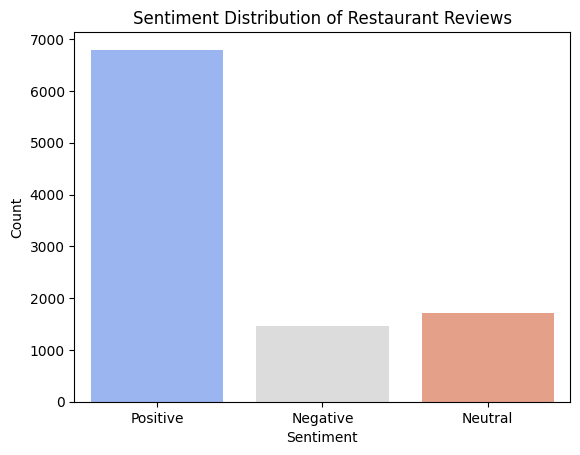

In [35]:
# Chart - 7 visualization code
# Sentiment Analysis on Reviews
from textblob import TextBlob

# Compute sentiment polarity (-1 = negative, +1 = positive)
reviews_df['Sentiment'] = reviews_df['Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify into categories
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['Sentiment_Label'] = reviews_df['Sentiment'].apply(classify_sentiment)

# Visualize sentiment distribution
sns.countplot(data=reviews_df, x='Sentiment_Label', palette='coolwarm')
plt.title('Sentiment Distribution of Restaurant Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot because it effectively shows the distribution of customer sentiments (Positive, Neutral, Negative), making it easy to understand overall customer satisfaction trends.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most reviews are positive (around 68%), followed by neutral (17%) and negative (15%). This indicates that the majority of customers had a good experience, with only a small portion expressing dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help businesses identify strengths in customer satisfaction and maintain quality standards. However, the presence of negative reviews highlights areas needing improvement—if ignored, these could lead to negative growth through reduced trust and customer retention.

#### Chart - 8 - Time-Based Analysis

C:\Users\ojadh\AppData\Local\Temp\ipykernel_5188\2889428584.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ojadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


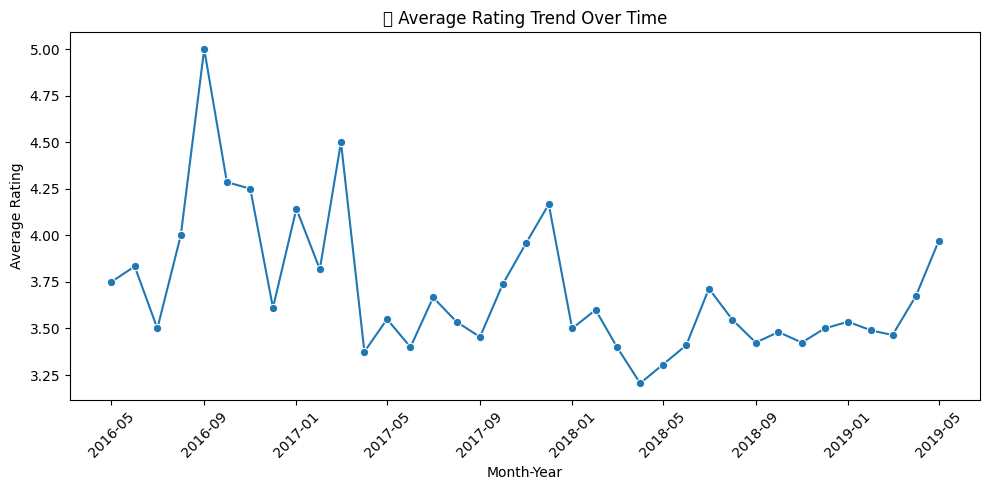

In [36]:
# Chart - 8 visualization code
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], errors='coerce')

reviews_df['YearMonth'] = reviews_df['Time'].dt.to_period('M').astype(str)

rating_trend = reviews_df.groupby('YearMonth')['Rating'].mean().reset_index()

rating_trend['YearMonth'] = pd.to_datetime(rating_trend['YearMonth'], format='%Y-%m')

plt.figure(figsize=(10,5))
sns.lineplot(x='YearMonth', y='Rating', data=rating_trend, marker='o')
plt.title('📈 Average Rating Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart because it effectively shows how the average restaurant ratings change over time, making it easy to identify trends, patterns, or fluctuations in customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that ratings fluctuate between 3.4 and 4.5, with occasional peaks (like in September 2016 and March 2017) indicating high customer satisfaction. Overall, the ratings remain fairly stable over time, showing consistent service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help businesses track changes in customer satisfaction and evaluate the impact of improvements or promotions. However, the dips in certain months suggest periods of lower performance, which, if not addressed, could lead to negative growth due to reduced customer trust or satisfaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objectives identified in this analysis, the following strategies and data-driven actions are recommended:

1. **Enhance Customer Experience through Data Insights:**
Use the insights from ratings, sentiment analysis, and cuisine preferences to identify what customers value most. Restaurants can improve their service quality, food presentation, and delivery experience to align with these preferences.

2. **Optimize Menu and Pricing Strategy:**
From the correlation between cost and ratings, restaurants can analyze whether pricing adjustments could attract more customers without compromising quality. Offering popular cuisines at competitive prices can boost overall satisfaction and ratings.

3. **Focus on High-Demand Cuisines and Locations:**
The cuisine and location analysis identifies areas and food types with high customer engagement. Zomato and partner restaurants can expand their presence in top-performing regions or introduce trending cuisines in underrepresented areas.

4. **Monitor Performance Trends Over Time:**
Time-based rating trends help track how customer satisfaction evolves. Restaurants can use this to evaluate promotional campaign effectiveness, adjust strategies seasonally, and maintain consistent service quality.

5. **Leverage Sentiment Analysis for Brand Improvement:**
By classifying reviews into positive, negative, and neutral categories, Zomato can monitor real-time feedback and promptly address negative sentiments. This improves trust and brand reputation.

6. **Strengthen Data-Driven Recommendations:**
Zomato can integrate these insights into its recommendation algorithm to provide personalized suggestions for users, improving engagement and retention.

# **Conclusion**

The Zomato Restaurant Review Analysis successfully provided a data-driven understanding of customer preferences, restaurant performance, and market trends.  

Key takeaways:  
- **Customer Ratings:** Most restaurants received high ratings (4–5), indicating overall satisfaction.  
- **Top Restaurants:** Outlets like Beyond Flavours and Flechazo consistently achieved high average ratings.  
- **Popular Cuisines:** North Indian, Chinese, and Continental cuisines dominate, reflecting customer demand.  
- **Price vs. Rating:** Moderate-cost restaurants often receive better ratings, suggesting value-for-money drives satisfaction.  
- **Customer Sentiment:** Sentiment analysis shows the majority of reviews are positive (~68%), with some negative reviews highlighting service improvement areas.  
- **Time Trends:** Ratings are relatively stable over time, allowing businesses to monitor performance and plan promotional strategies.  

Overall, this project equips restaurant managers and Zomato with actionable insights to optimize pricing, enhance service quality, and improve customer engagement.
